In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [30]:
df=pd.read_csv('./reconstruction/train.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          200 non-null    float64
 1   displacement  200 non-null    float64
 2   velocity      200 non-null    float64
 3   acceleration  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


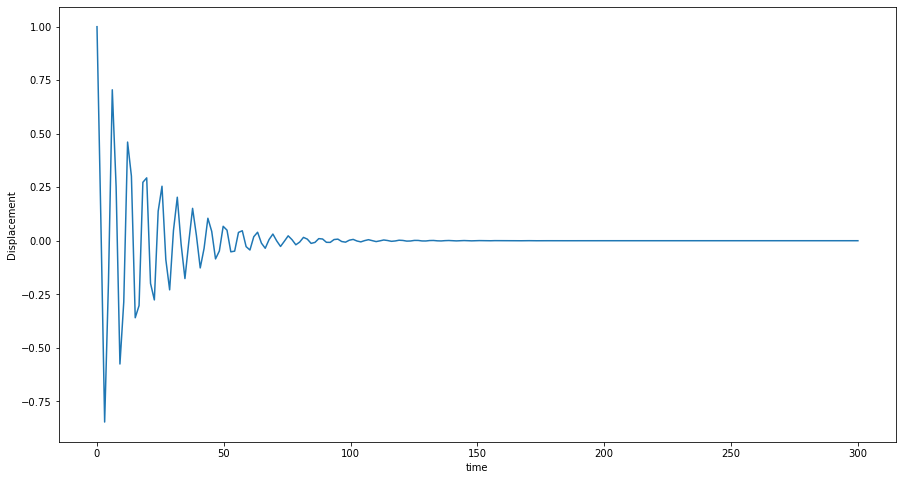

In [32]:
X=df['time']
dis=df['displacement']
plt.figure(figsize=(15,8))

plt.xlabel("time")
plt.ylabel("Displacement")
plt.plot(X,dis)

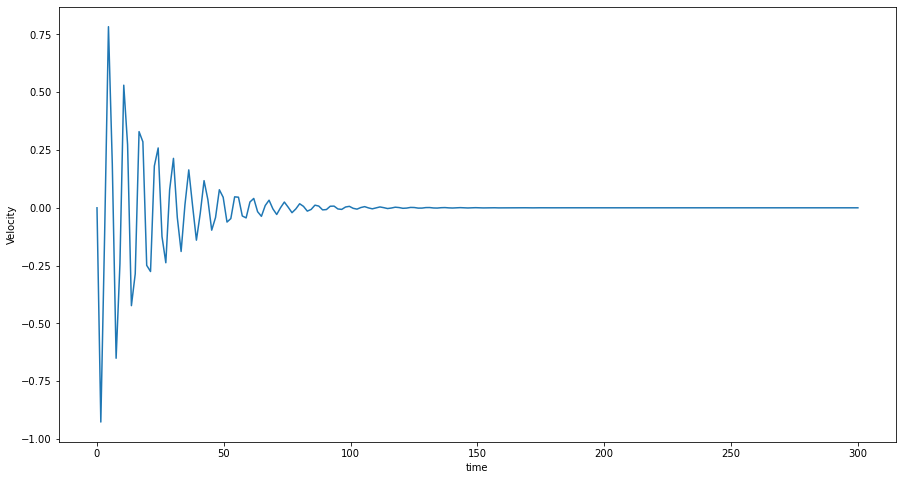

In [33]:
X=df['time']
vel=df['velocity']
plt.figure(figsize=(15,8))
plt.xlabel("time")
plt.ylabel("Velocity")
plt.plot(X,vel)

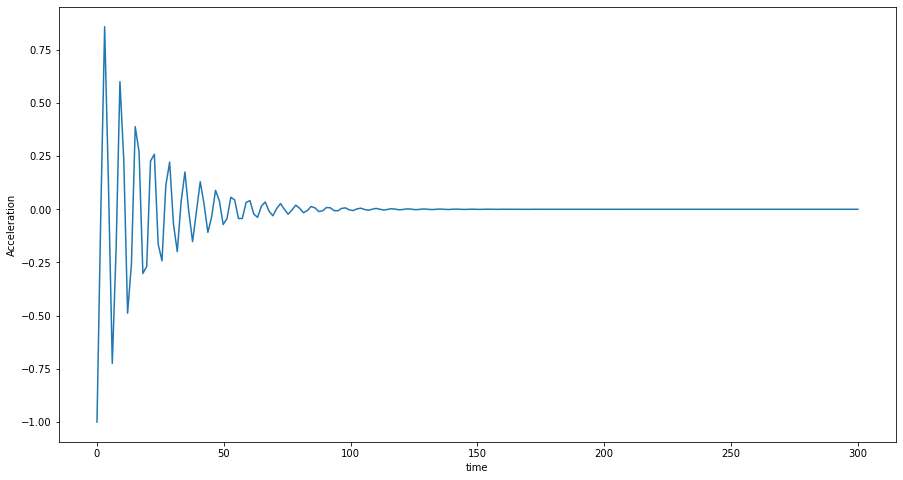

In [34]:
X=df['time']
acc=df['acceleration']
plt.figure(figsize=(15,8))
plt.xlabel("time")
plt.ylabel("Acceleration")
plt.plot(X,acc)

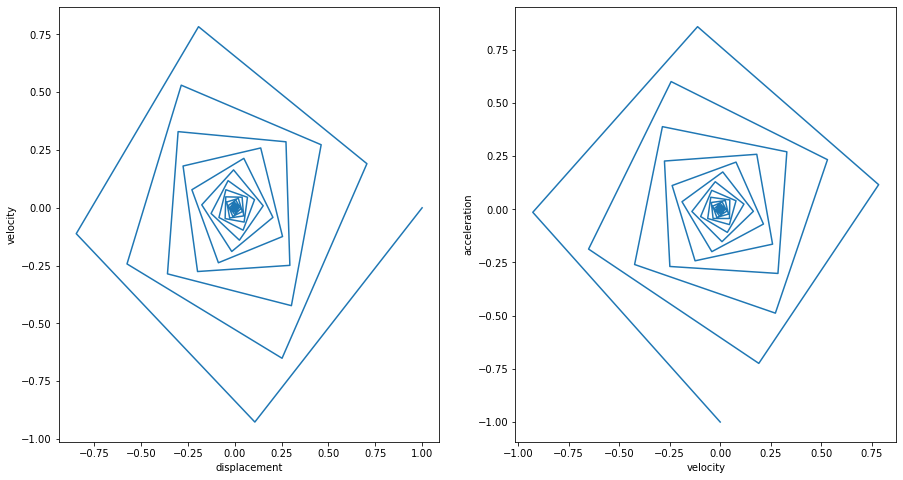

In [41]:
X=df['displacement']
vel=df['velocity']

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel("displacement")
plt.ylabel("velocity")
plt.plot(X,vel,)
plt.subplot(1,2,2)
plt.xlabel("velocity")
plt.ylabel("acceleration")
plt.plot(vel,acc,)


In [36]:

time =np.array(df['time'])
displacement = np.array(df['displacement'])
speed = np.array(df['velocity'])

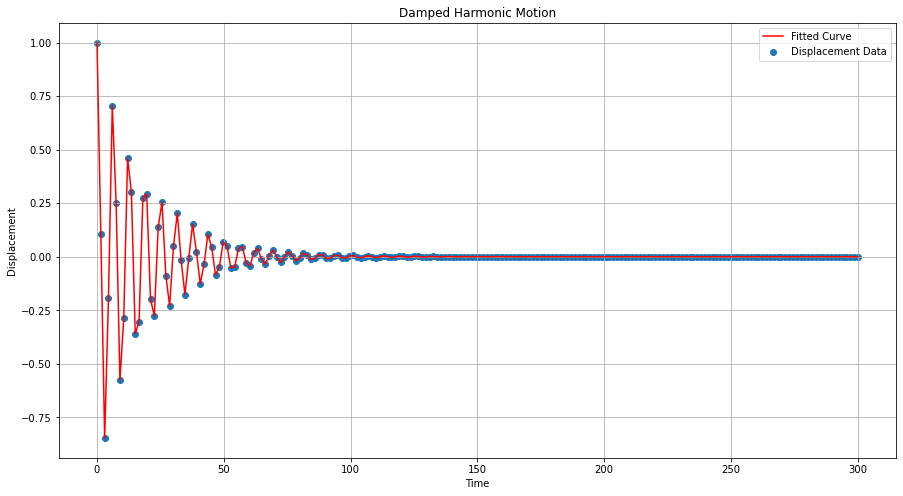

Amplitude: 1.0012518227179554
Decay: 0.04999999649287433


In [37]:


# Define the function for fitting a curve to the data
def damped_harmonic_motion(t, A, omega, phi, decay):
    return A * np.exp(-decay * t) * np.cos(omega * t + phi)

# Fit the curve to the data
initial_guess = (np.max(displacement), 1, 0, 0.1)  # Initial parameter guesses
params, params_covariance = curve_fit(damped_harmonic_motion, time, displacement, p0=initial_guess)

# Extract the fitted parameters
amplitude, omega, phi, decay = params

# Plot the data and the fitted curve
plt.figure(figsize=(15, 8))
plt.scatter(time, displacement, label='Displacement Data')
plt.plot(time, damped_harmonic_motion(time, *params), 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Damped Harmonic Motion')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f"Amplitude: {amplitude}")
print(f"Decay: {decay}")

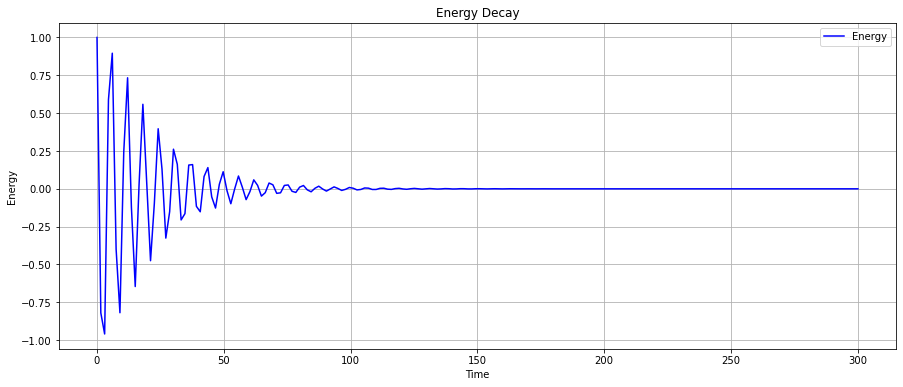

In [38]:





# Calculate the energy at each time point
energy = 0.5 * (displacement*2 + speed*2)

# Plot the energy against time
plt.figure(figsize=(15, 6))
plt.plot(time, energy, 'b-', label='Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Decay')
plt.legend()
plt.grid(True)
plt.show()

Damping Regime: Underdamped


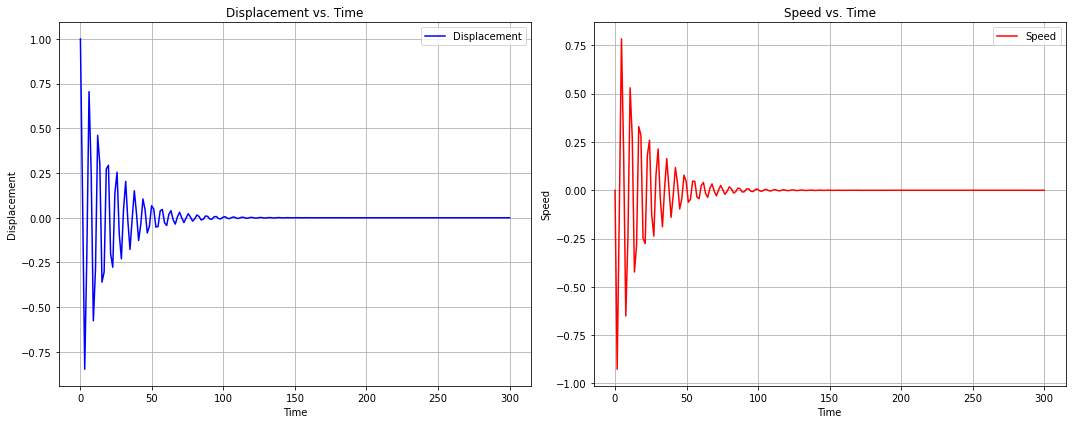

In [39]:




# Calculate the damping coefficient (replace with your own calculation)
damping_coefficient = decay

# Calculate the critical damping coefficient (replace with your own calculation)
critical_damping_coefficient = 1.0

# Categorize the motion based on the damping coefficient
if damping_coefficient < critical_damping_coefficient:
    damping_regime = 'Underdamped'
elif damping_coefficient == critical_damping_coefficient:
    damping_regime = 'Critically Damped'
else:
    damping_regime = 'Overdamped'

# Plot the displacement and speed data
plt.figure(figsize=(15, 6))

# Plot the displacement
plt.subplot(1, 2, 1)
plt.plot(time, displacement, 'b-', label='Displacement')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement vs. Time')
plt.legend()
plt.grid(True)

# Plot the speed
plt.subplot(1, 2, 2)
plt.plot(time, speed, 'r-', label='Speed')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs. Time')
plt.legend()
plt.grid(True)

# Print the damping regime
print(f"Damping Regime: {damping_regime}")

plt.tight_layout()
plt.show()